<a href="https://colab.research.google.com/github/retanshichauhan/Prediction-Analysis-on-Titanic-Dataset/blob/main/titanic_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will input the training and testing data

In [ ]:
# import the dataset
train_data = pd.read_csv('titanic_train.csv')

In [ ]:
train_data.shape

(891, 12)

In [ ]:
test_data = pd.read_csv('titanic_train.csv')
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_data.shape

(891, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that in our data there are missing values in 'Age', 'Fare' and 'Cabin' columns

We will check for duplicated values as well

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
test_data.duplicated().sum()

0

We can see there are no duplicate data in our dataset

Let us see how many passangers survived.

In [ ]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

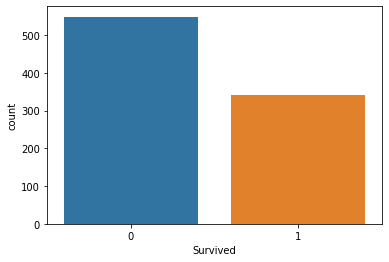

In [ ]:
import seaborn as sns
sns.countplot(x='Survived', data=train_data)

We can see that in our training data only 38% of people survived

Sex

In [ ]:
train_data['Sex']. value_counts().to_frame()

,Sex
male,577
female,314


In [ ]:
train_data.groupby('Sex').Survived.mean().to_frame()

,Survived
Sex,
female,0.742038
male,0.188908


We can see that in our data 74% of females survived where as only 18% of males survived

Text(0.5, 1.0, 'Survived by Sex')

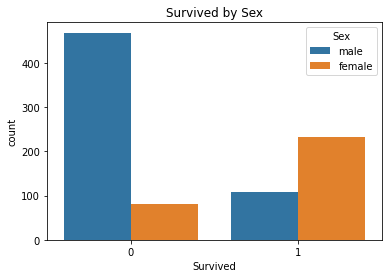

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survived by Sex')

1. We can see that around 65% of passengers were male while the remaining 35% were female.
2. Survival rate for women was four times the survival rate for men and this makes sex one of the most informative features

Pclass

In [ ]:
train_data['Pclass']. value_counts().to_frame()

,Pclass
3,491
1,216
2,184


In [ ]:
# train_data['Pclass'].value_counts(normalize=True)
train_data.groupby('Pclass').Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


We can see from the above that the no of Class 1 category people survived the most compared to the no of Class 2 category people.

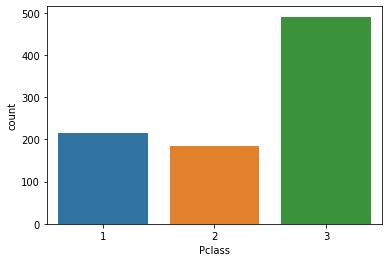

In [ ]:
sns.countplot(x='Pclass', data=train_data)

Text(0.5, 1.0, 'Survival according to the Pclass')

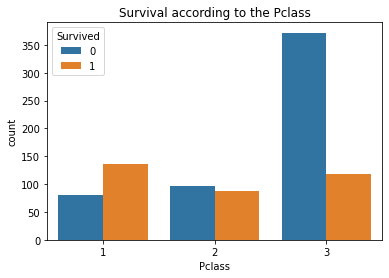

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival according to the Pclass')

1. There ewre thre class on the ship and from the  plot we see that the no of passengers in third class was higher than the no of passengers tn first and second combined.
2. The survival rate by class is not same, more than 60% of first class passengers and around half of the second class passengers were resued, whereas 75% of third class passengers were not able to survive the disaster.

Pclass & Sex

In [ ]:
train_data['Pclass']. value_counts().to_frame()

,Pclass
3,491
1,216
2,184


Text(0.5, 1.0, 'Survival rate according to Pclass & Sex')

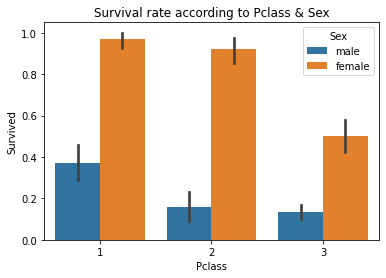

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data)
plt.title('Survival rate according to Pclass & Sex')

1. First and second class women who were rescued were respectively 97% and 92%, while the percentage drops to 50% for third class women.
2. Despite that, this is still more than the 37% survival rate for first class women.

In [ ]:
train_data.groupby(['Pclass','Sex']). Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

Age, Pclass,Survived

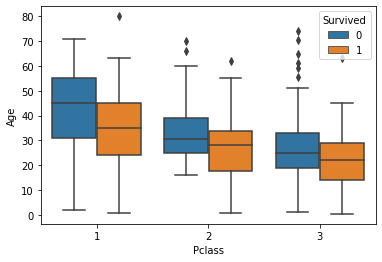

In [ ]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data)

1. We can see the influence of Pclass is the important one as there are no super clear horizontal patterns.
2. Also, we note that there were not many children in the first class.

Fare

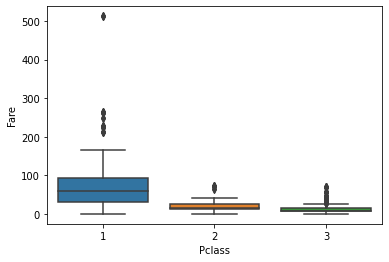

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=train_data)

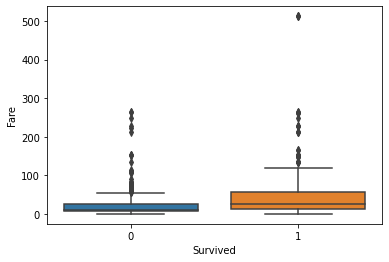

In [ ]:
sns.boxplot(x='Survived', y='Fare',data=train_data)

1. We can see that the Fare distribution is positively skewed, with 75% of data under 31 and a goes to 500.
2. We notice that the higher the fare, the higher the possibility of surviving. 

In [ ]:
train_data[train_data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
def remove_zero_fares(row):
  if row.Fare == 0:
    row.Fare = np.NaN
  return row  

In [ ]:
train_data = train_data.apply(remove_zero_fares, axis=1)
test_data = test_data.apply(remove_zero_fares, axis=1)

In [ ]:
train_data[train_data['Fare'] == 0]
train_data[test_data['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


We can see that we have made the rows with Fare as 0 to Null

Embarked, Pclass

In [ ]:
train_data['Embarked']. value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

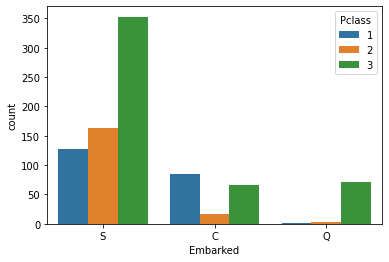

In [ ]:
sns.countplot(x='Embarked', hue='Pclass', data=train_data)

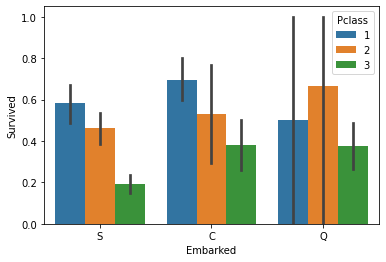

In [ ]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train_data)

Names

In [ ]:
train_data['Title'] = train_data['Name']. apply(lambda x: x.split(',')[1].split(',')[0].strip())
test_data['Title'] = test_data['Name']. apply(lambda x: x.split(',')[1].split(',')[0].strip())

In [ ]:
train_data['Title'].value_counts()

Mr. John                                                        7
Mr. James                                                       7
Miss. Mary                                                      6
Mr. William                                                     6
Mr. William John                                                4
                                                               ..
Mr. Howard Hugh "Harry"                                         1
Master. Hudson Trevor                                           1
Miss. Margaret                                                  1
Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)    1
Mr. Karl Howell                                                 1
Name: Title, Length: 803, dtype: int64

In [ ]:
test_data['Title'].value_counts()

Mr. John                                                        7
Mr. James                                                       7
Miss. Mary                                                      6
Mr. William                                                     6
Mr. William John                                                4
                                                               ..
Mr. Howard Hugh "Harry"                                         1
Master. Hudson Trevor                                           1
Miss. Margaret                                                  1
Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)    1
Mr. Karl Howell                                                 1
Name: Title, Length: 803, dtype: int64

In [ ]:
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mile', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mile', 'the Countess', 'Dona'], 'Miss', inplace=True)
train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [ ]:
train_data['Title'].value_counts()

Mr. John                                                        7
Mr. James                                                       7
Miss. Mary                                                      6
Mr. William                                                     6
Mr. William John                                                4
                                                               ..
Mr. Howard Hugh "Harry"                                         1
Master. Hudson Trevor                                           1
Miss. Margaret                                                  1
Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)    1
Mr. Karl Howell                                                 1
Name: Title, Length: 803, dtype: int64

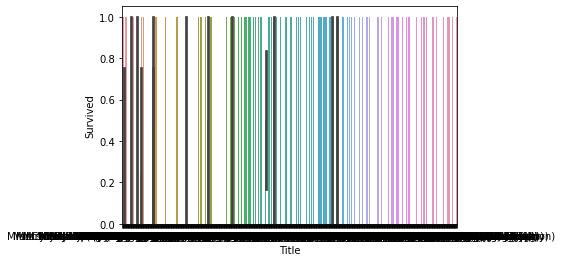

In [ ]:
sns.barplot(x='Title', y='Survived', data=train_data)